# Loan prediction project

In [686]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [687]:
train=pd.read_csv('Downloads/train_u6lujuX_CVtuZ9i.csv')
test=pd.read_csv('Downloads/test_Y3wMUE5_7gLdaTN.csv')


In [688]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [689]:
test.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [690]:
train.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [691]:
train.columns
#We have 11 independent variables and 1 target value

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [692]:
test.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

we will predict the values of loan status based upon the model built using train dataset 

In [693]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [694]:
train.shape

#614 rows and 13 columns (extra column-loan approval-label)

(614, 13)

In [695]:
test.shape
#367 rows and 12 columns

(367, 12)

# Univariate Analysis 

In [696]:
#We are analysing the target value

train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [697]:
train['Loan_Status'].value_counts(normalize=True) #giving proportions 

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: >

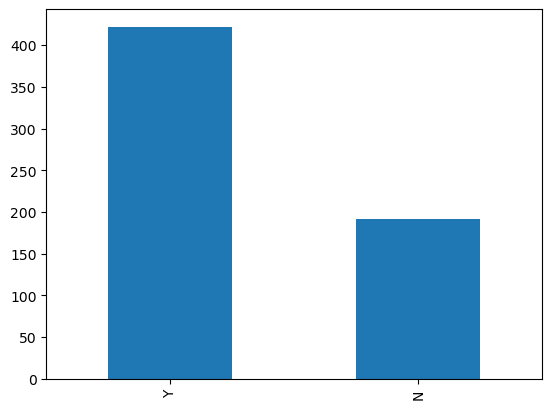

In [698]:
train['Loan_Status'].value_counts().plot.bar()


# Independent Variable (Categorical)

<Axes: title={'center': 'Credit_History'}>

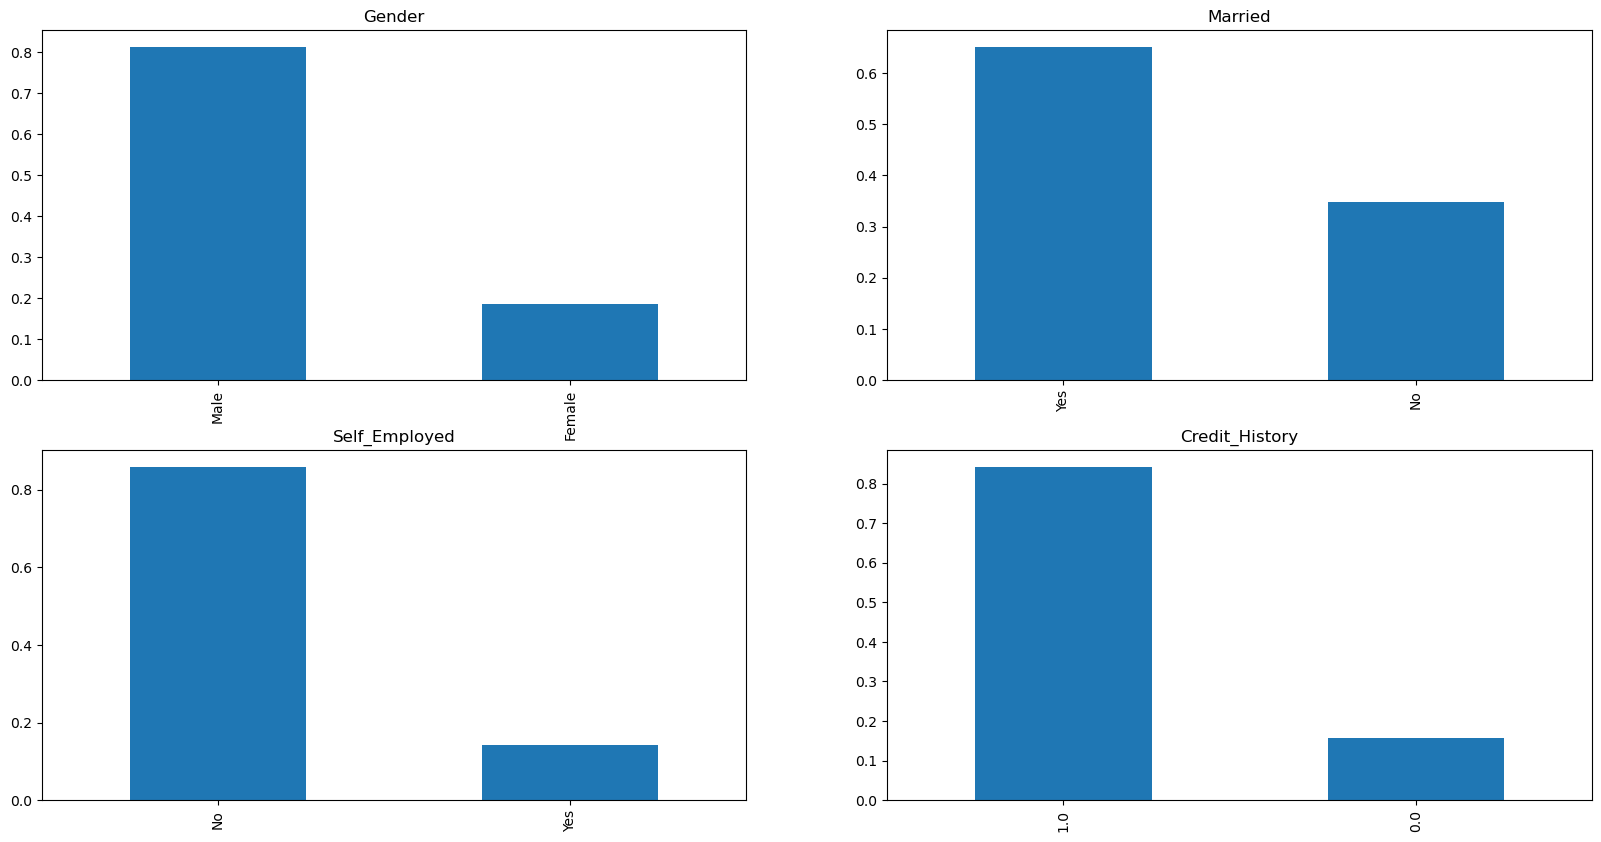

In [699]:
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History')

Inferences of the univariate analysis of categorical data

1)80% of the applicants are male
2)65% of the applicants are married
3)15% of the applicants are self_employed
4) around 85% of the applicants have repaid their debts


# Ordinal Values


<Axes: title={'center': 'Property_Area'}>

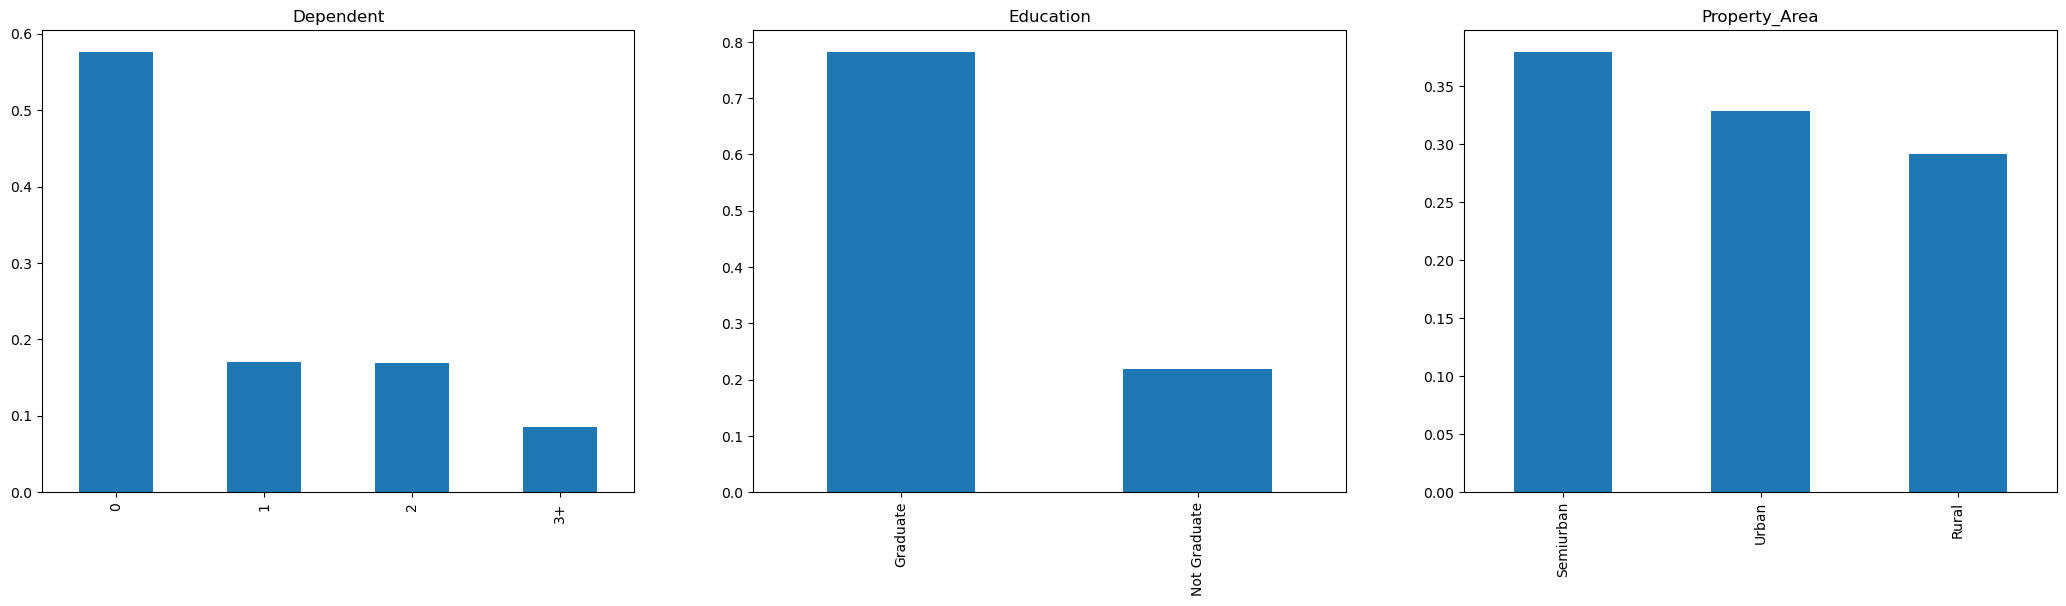

In [700]:
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependent')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(26,6),title='Property_Area')

Inference:
1)Most of the dependents are Dependent
2)About 80% of the applicants are graduate
3)Most of the applicants are from semi urban area

# Independent variable (numeric)

/var/folders/8r/pn9yp9cx79q54m6vgfdd844m0000gn/T/ipykernel_18826/2255629618.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome'])   #it is a deprecated function in seaborn v0.14.0 library


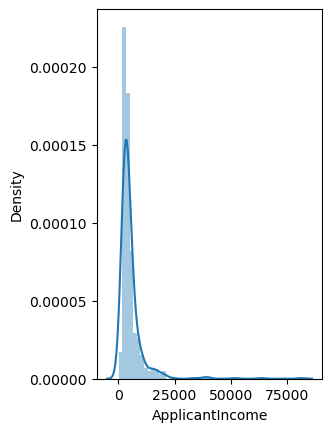

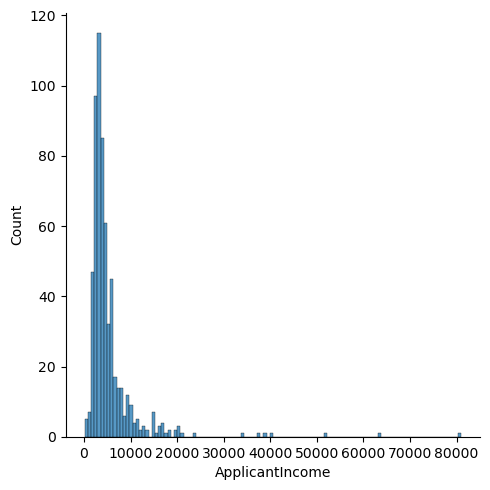

<Axes: >

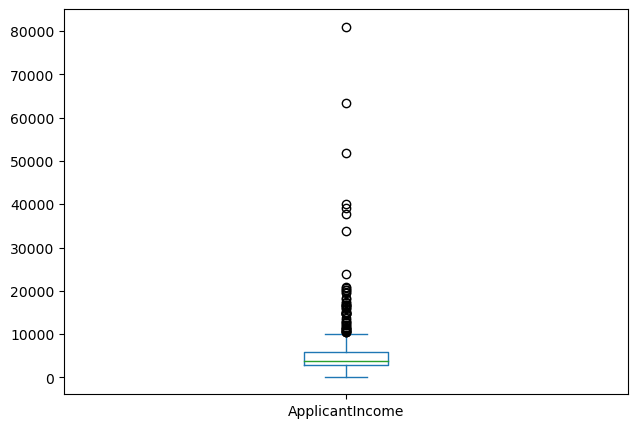

In [701]:
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])   #it is a deprecated function in seaborn v0.14.0 library 
sns.displot(train['ApplicantIncome'])
plt.show()
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))


/var/folders/8r/pn9yp9cx79q54m6vgfdd844m0000gn/T/ipykernel_18826/2939147803.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['LoanAmount'])


<Axes: >

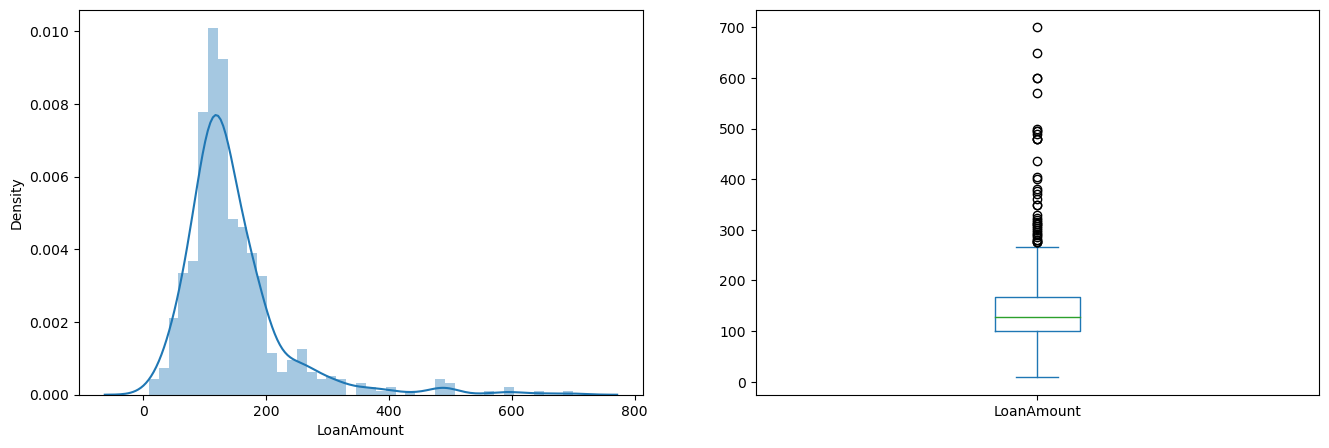

In [702]:
plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

# Bivariate Analysis 

relationship of Loan_Status (target) with other variables.
Hypothesis generation :
    Factors that affect the loan status
    1)Salary-applicants having higher salary  have more chances of loan approval
    2)credit history-applicants having clear debt history have more chances of loan approval
    3)Loan amount-lesser the loan amount higher will be the chances of loan approval
    4)EMI-lesser the amount to be paid monthly , the higher chances of approval
    5)Loan Term - less the time has higher chances of approval
    
   Testing above hypothesis with the bivariate analysis


# Categorical independent variables vs target value

<Axes: xlabel='Gender'>

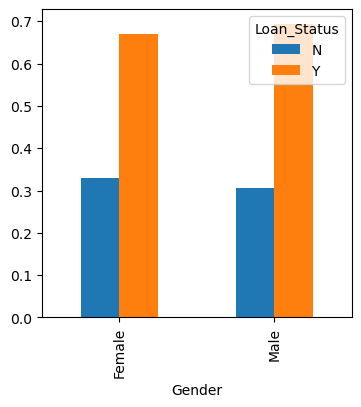

In [703]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))

<Axes: xlabel='Education'>

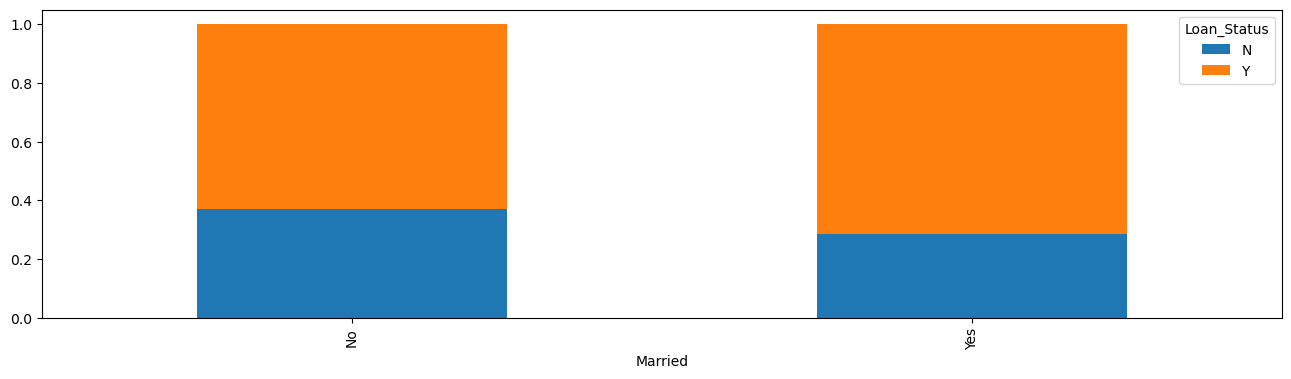

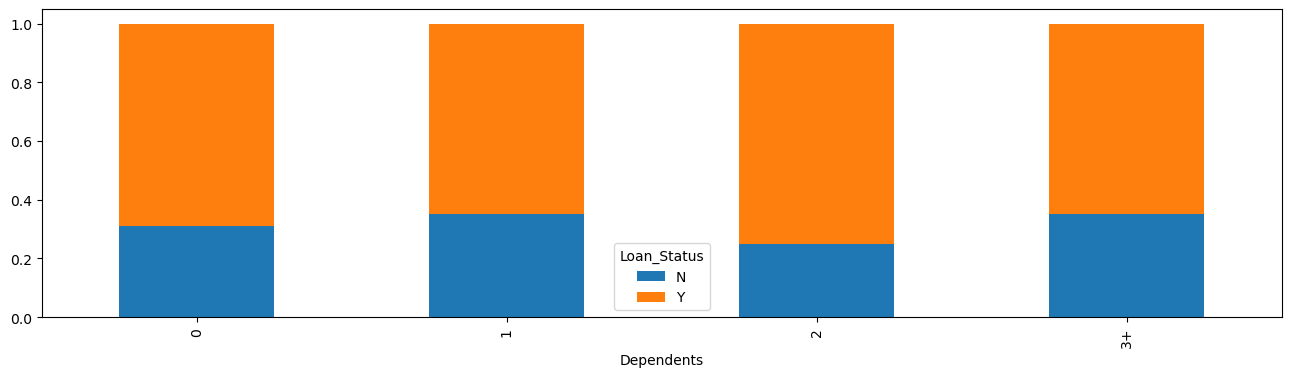

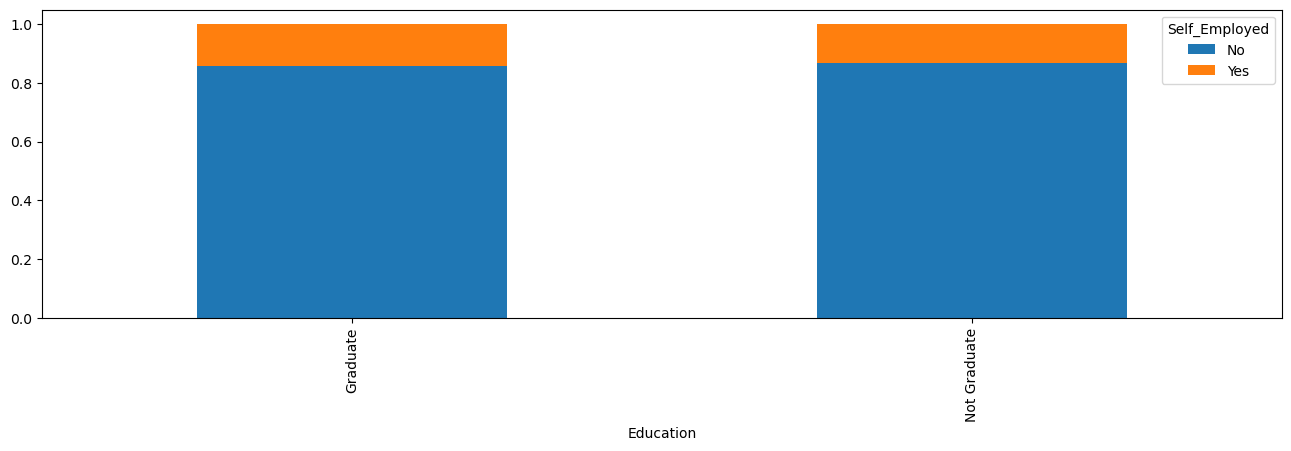

In [704]:
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Self_Employed'])

Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(16,4))
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(16,4))
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(16,4))

<Axes: xlabel='Property_Area'>

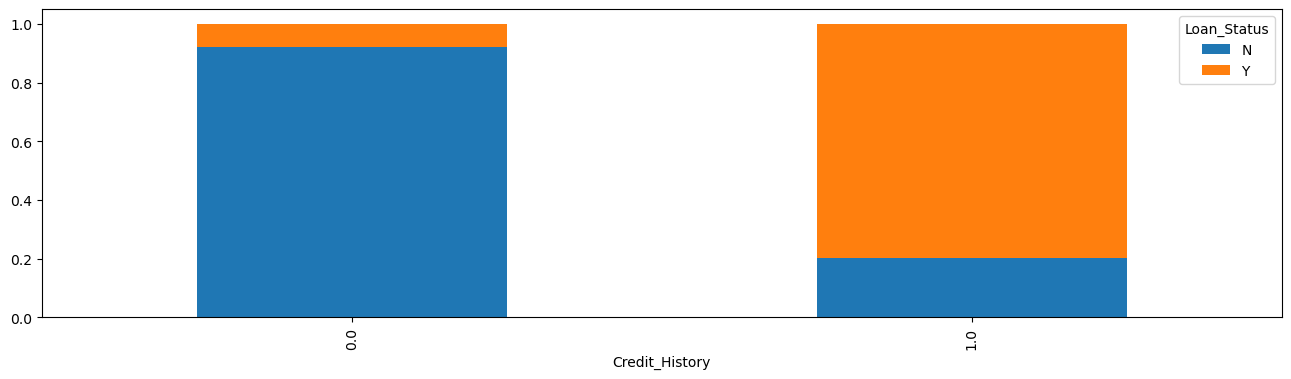

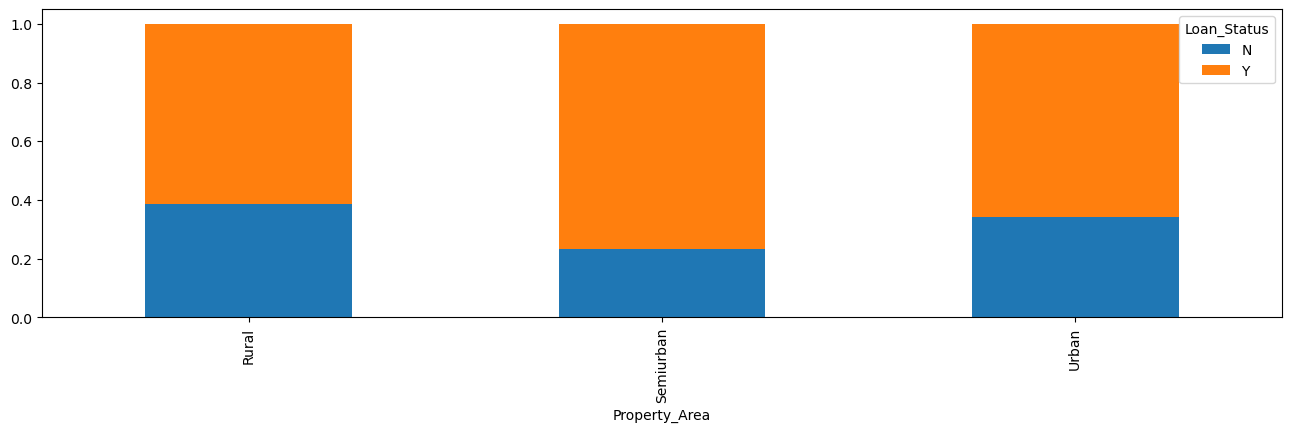

In [705]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(16,4))
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(16,4))

# Numerical Indepenent variable vs target value

<Axes: xlabel='Loan_Status'>

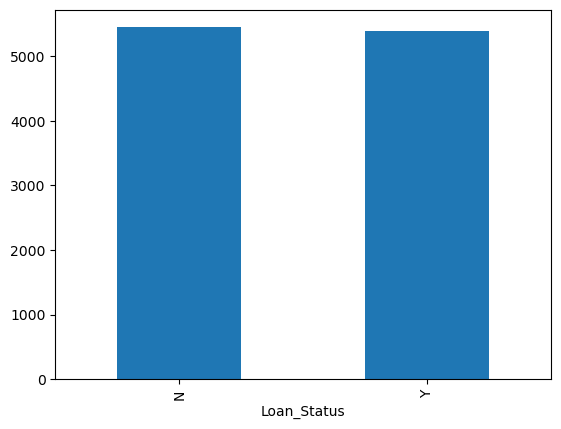

In [706]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

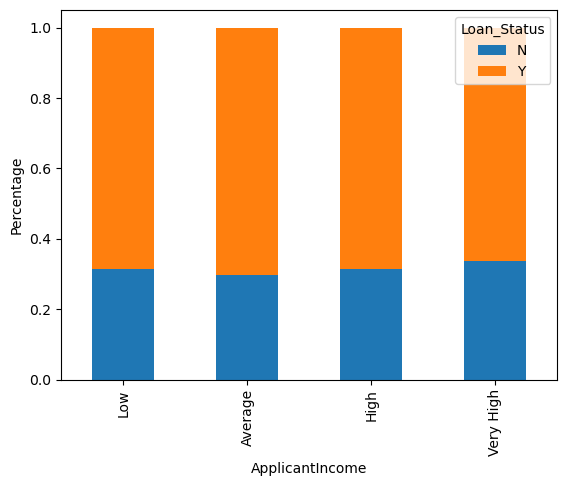

In [707]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High','Very High']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentaage')

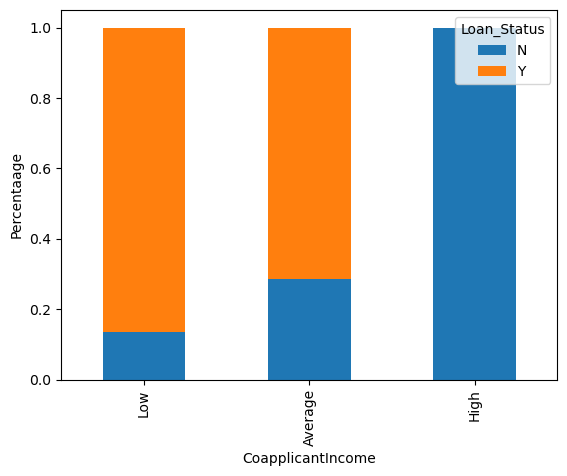

In [708]:
#we will analyse applicant's income with the loan amount variable 
bins=[0,1000,30000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentaage')

Text(0, 0.5, 'Percentage')

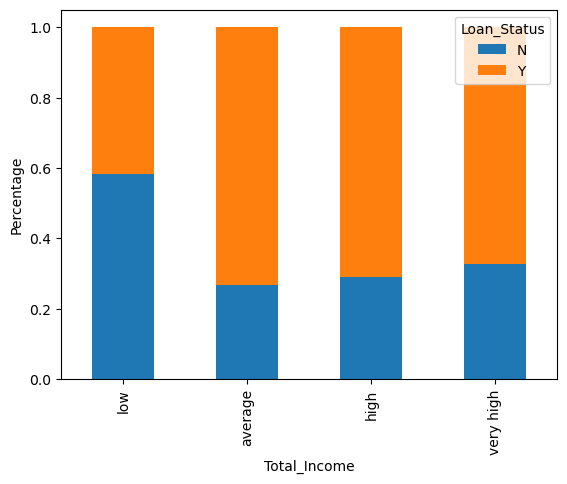

In [709]:
#combining applicant income and coapplicant income
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['low','average','high','very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

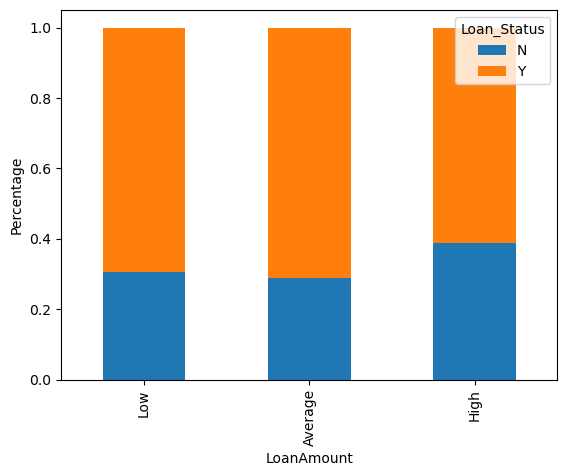

In [710]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

In [711]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,high,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,high,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,high,Average


In [712]:
train=train.drop(['Income_bin'],axis=1)
train=train.drop(['Coapplicant_Income_bin'],axis=1)
train=train.drop(['Total_Income'],axis=1)
train=train.drop(['Total_Income_bin'],axis=1)
train=train.drop(['LoanAmount_bin'],axis=1)
train['Dependents'].replace('3+','3')
test['Dependents'].replace('3+','3')
train['Loan_Status'].replace('N','0')
train['Loan_Status'].replace('Y','1')

0      1
1      N
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    N
Name: Loan_Status, Length: 614, dtype: object

/var/folders/8r/pn9yp9cx79q54m6vgfdd844m0000gn/T/ipykernel_18826/369521194.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix=train.corr()


<Axes: >

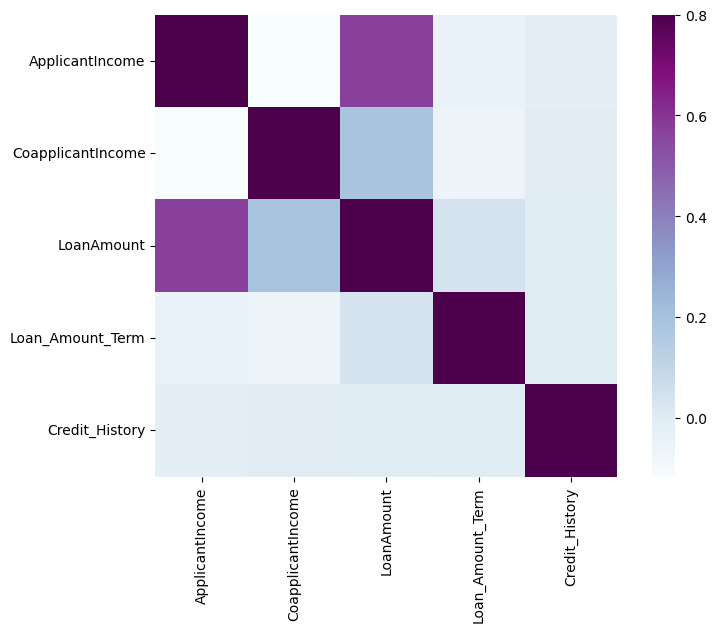

In [713]:
#Correlation between all the  numerical variables using heat map.
#Heat maps visualize the data through color variation
#heat map with darker colour having more correlation

matrix=train.corr()
f,ax=plt.subplots(figsize=(9,6))

sns.heatmap(matrix,vmax=0.8,square='True',cmap="BuPu")

After exploring all the variables in our  data, we can now impute the missing values (Data imputation)  

In [714]:
train.isnull().sum() #for calculating the number of null values in our dataset

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

for numerical values: 
1) mean and median
for categorical values:
mode

In [715]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Married'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [716]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [717]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [718]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [719]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [720]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)


# Outlier treatment - Log transformation

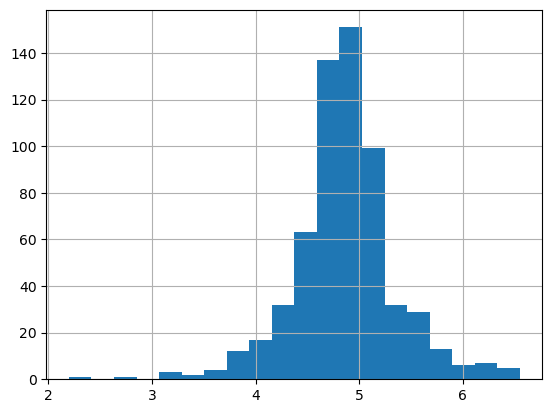

In [721]:
train['Loan_amount_log']=np.log(train['LoanAmount'])
train['Loan_amount_log'].hist(bins=20)
test['Loan_amount_log']=np.log(test['LoanAmount'])

In [722]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)
train['Loan_amount_log'].fillna(test['Loan_amount_log'].median(),inplace=True)
test['Loan_amount_log'].fillna(test['Loan_amount_log'].median(),inplace=True)


In [723]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Loan_amount_log      0
dtype: int64

In [724]:
X=train.drop('Loan_Status',axis=1)
y=train.Loan_Status
print(X)
print(y)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No             5849   
1      Male     Yes          1      Graduate            No             4583   
2      Male     Yes          0      Graduate           Yes             3000   
3      Male     Yes          0  Not Graduate            No             2583   
4      Male      No          0      Graduate            No             6000   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No             2900   
610    Male     Yes         3+      Graduate            No             4106   
611    Male     Yes          1      Graduate            No             8072   
612    Male     Yes          2      Graduate            No             7583   
613  Female      No          0      Graduate           Yes             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [739]:
train.Loan_Status = train.Loan_Status.replace({"Y": 1, "N" : 0})
# loan_test.Loan_Status = loan_test.Loan_Status.replace({"Y": 1, "N" : 0}) 

train.Gender = train.Gender.replace({"Male": 1, "Female" : 0})
test.Gender = test.Gender.replace({"Male": 1, "Female" : 0})

train.Married = train.Married.replace({"Yes": 1, "No" : 0})
test.Married = test.Married.replace({"Yes": 1, "No" : 0})

train.Self_Employed =train.Self_Employed.replace({"Yes": 1, "No" : 0})
test.Self_Employed = test.Self_Employed.replace({"Yes": 1, "No" : 0})

train.Education =train.Education.replace({"Graduate": 1, "Not Graduate" : 0})
test.Education = test.Education.replace({"Graduate": 1, "Not Graduate" : 0})

In [756]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature set and y is your target labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [757]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [758]:
train_features = ['Credit_History', 'Education', 'Gender']


x_train = train[train_features].values
y_train = train['Loan_Status'].values

x_test = test[train_features].values

In [759]:
logistic_model = LogisticRegression()

In [760]:
train_features=['Credit_History','Gender','Education']
X_train=train[train_features].values
Y_train=train['Loan_Status'].values
X_test=test[train_features].values

In [761]:
logistic_model.fit(X_train, Y_train)

LogisticRegression()

# Predict the model

In [762]:
predict=logistic_model.predict(X_test)

In [763]:
print('Coefficient of model :', logistic_model.coef_)


Coefficient of model : [[3.30731267 0.10627116 0.32017165]]


In [764]:
print('Intercept of model',logistic_model.intercept_)


Intercept of model [-2.35337046]


In [765]:
score = logistic_model.score(x_train, y_train)
print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.8094462540716613
accuracy_score percent : 80.94


In [766]:
predict_test=logistic_model.predict(x_test)
print(pred_test)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y